In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/Motor Beat").with_suffix('')

In [5]:
image_count =len(list(data_dir.glob('*/*.jpg')))
print(image_count)

514


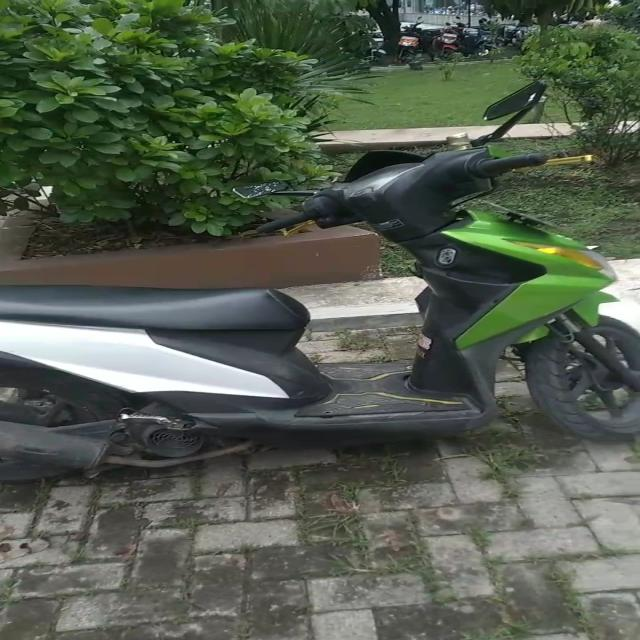

In [6]:
Beat_Hijau = list(data_dir.glob('Beat Hijau/*'))
PIL.Image.open(str(Beat_Hijau[0]))

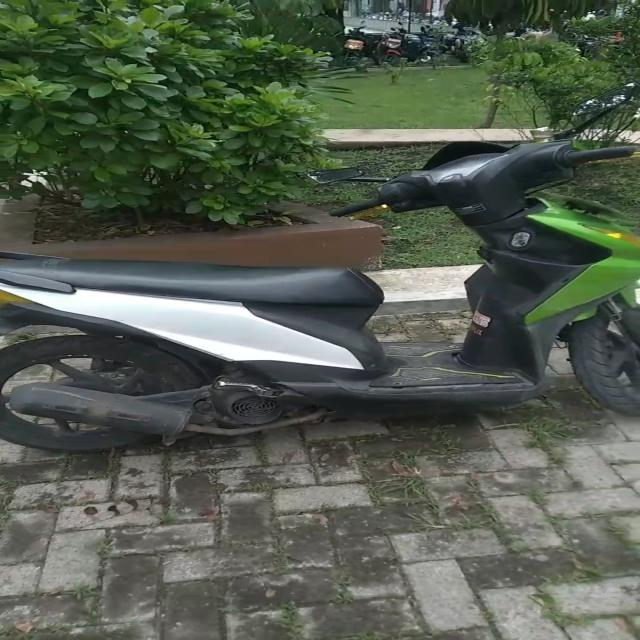

In [7]:
PIL.Image.open(str(Beat_Hijau[1]))

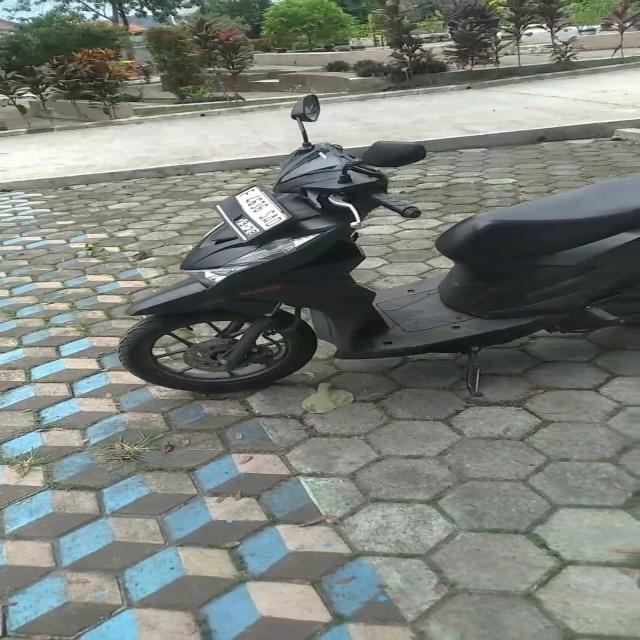

In [8]:
Beat_Hitam = list(data_dir.glob('Beat Hitam/*'))
PIL.Image.open(str(Beat_Hitam[0]))

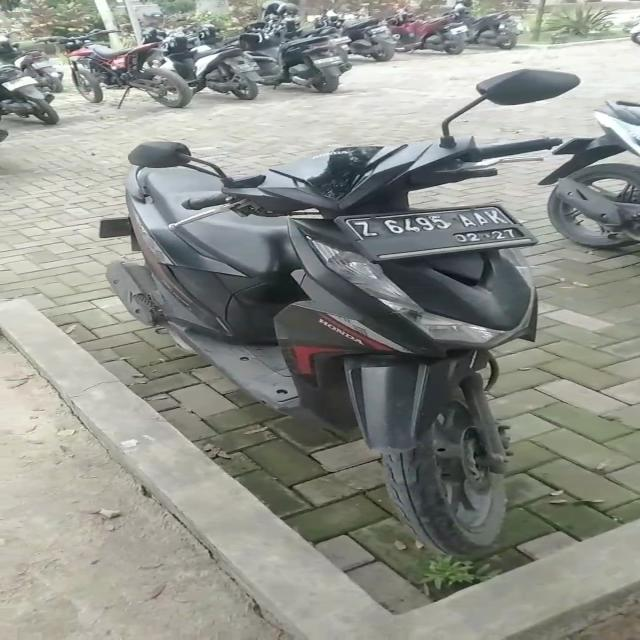

In [9]:
PIL.Image.open(str(Beat_Hitam[1]))

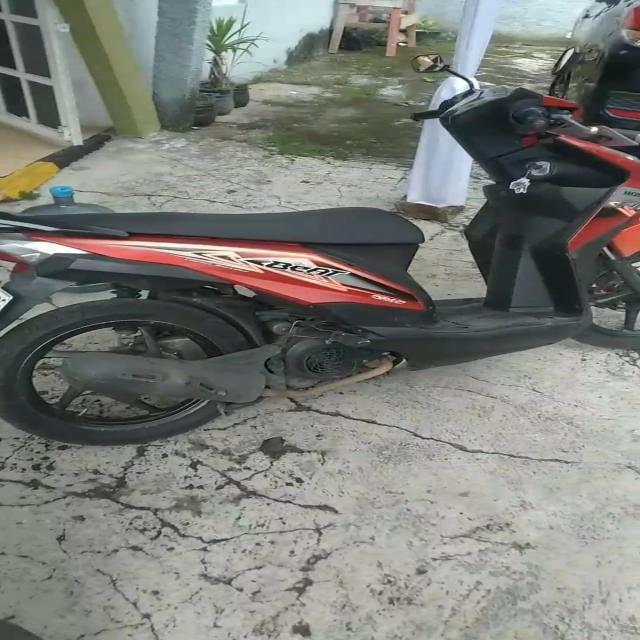

In [10]:
Beat_Merah = list(data_dir.glob('Beat Merah/*'))
PIL.Image.open(str(Beat_Merah[0]))

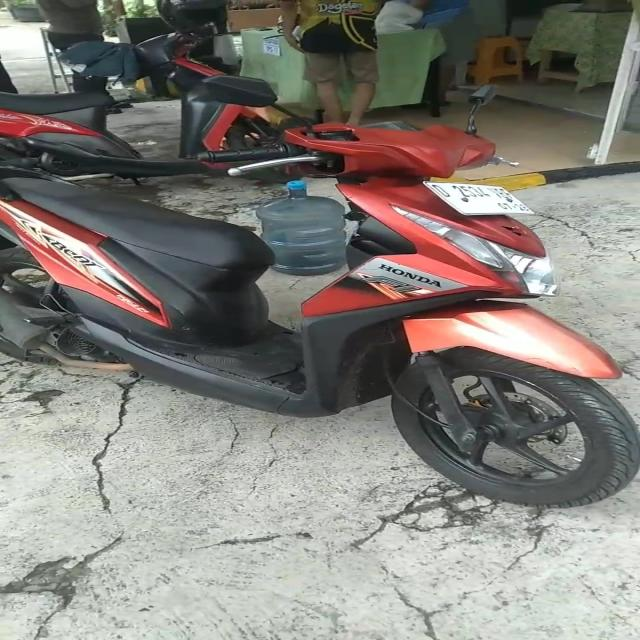

In [11]:
PIL.Image.open(str(Beat_Merah[1]))

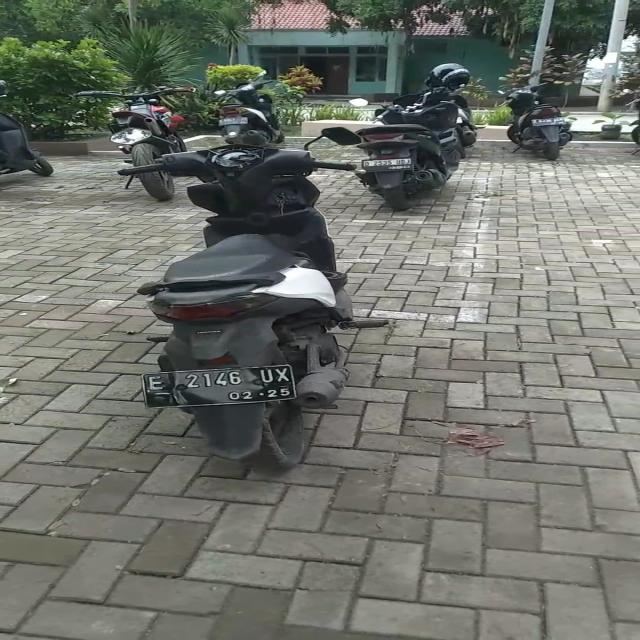

In [12]:
Beat_Putih = list(data_dir.glob('Beat Putih/*'))
PIL.Image.open(str(Beat_Putih[0]))

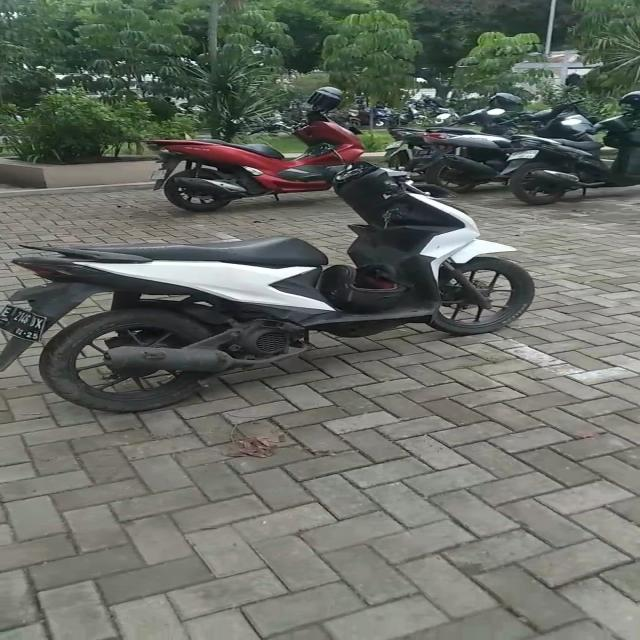

In [13]:
PIL.Image.open(str(Beat_Putih[1]))

In [14]:
batch_size =32
img_height =100
img_width =100

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 514 files belonging to 4 classes.
Using 412 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed= 123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 514 files belonging to 4 classes.
Using 102 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['Beat Hijau', 'Beat Hitam', 'Beat Merah', 'Beat Putih']


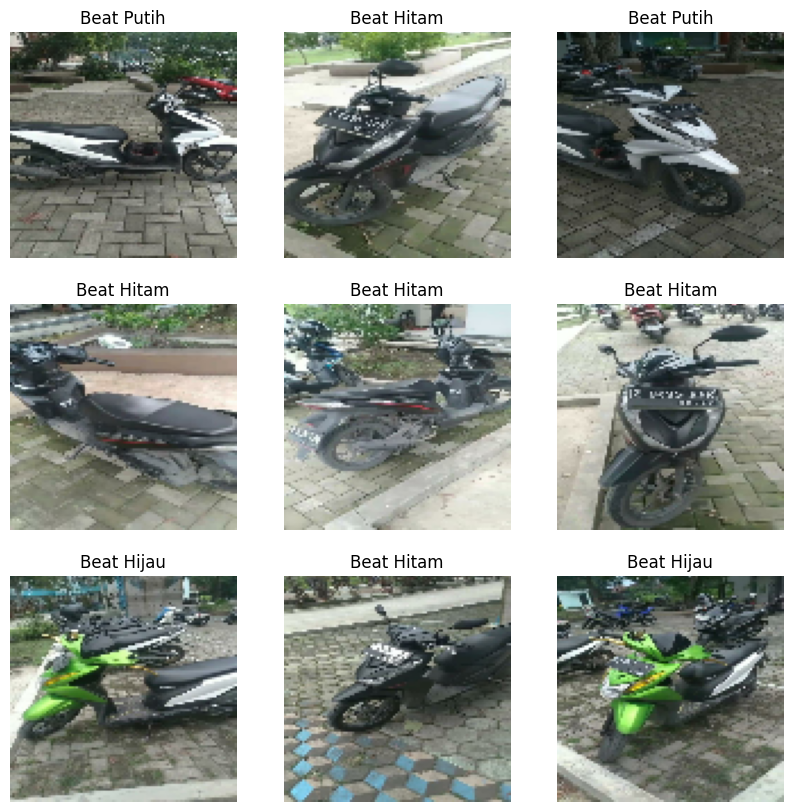

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 100, 100, 3)
(32,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers. Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in [0,1].
print(np.min(first_image), np.max(first_image))

0.020470826 1.0


In [23]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense (128, activation='relu'),
    layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy
              (from_logits=True), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,203,876 (4.59 MB)

 Trainable params: 1,203,876 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
epochs=10
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4792 - loss: 1.2842 - val_accuracy: 0.5490 - val_loss: 1.1191
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6679 - loss: 0.8716 - val_accuracy: 0.6569 - val_loss: 0.8190
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8381 - loss: 0.4759 - val_accuracy: 0.7353 - val_loss: 0.6371
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8774 - loss: 0.3442 - val_accuracy: 0.9412 - val_loss: 0.2444
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9556 - loss: 0.1684 - val_accuracy: 0.9118 - val_loss: 0.2420
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9721 - loss: 0.0815 - val_accuracy: 0.9412 - val_loss: 0.1697
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9974 - loss: 0.0326 - val_accuracy: 0.9510 - val_loss: 0.1941
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9973 - loss: 0.0206 - val_accuracy: 0.9608 - val_

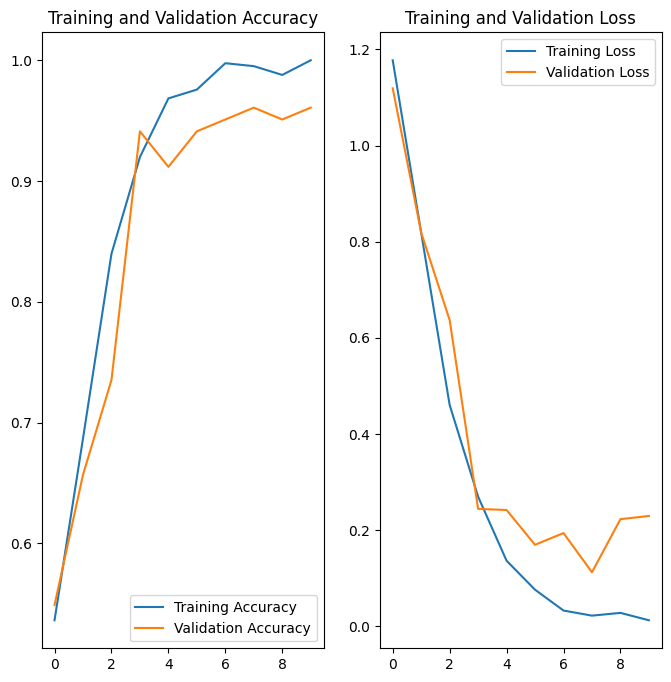

In [27]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:

data_augmentation = keras.Sequential(
 [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                   img_width,
                                   3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
 ]
)

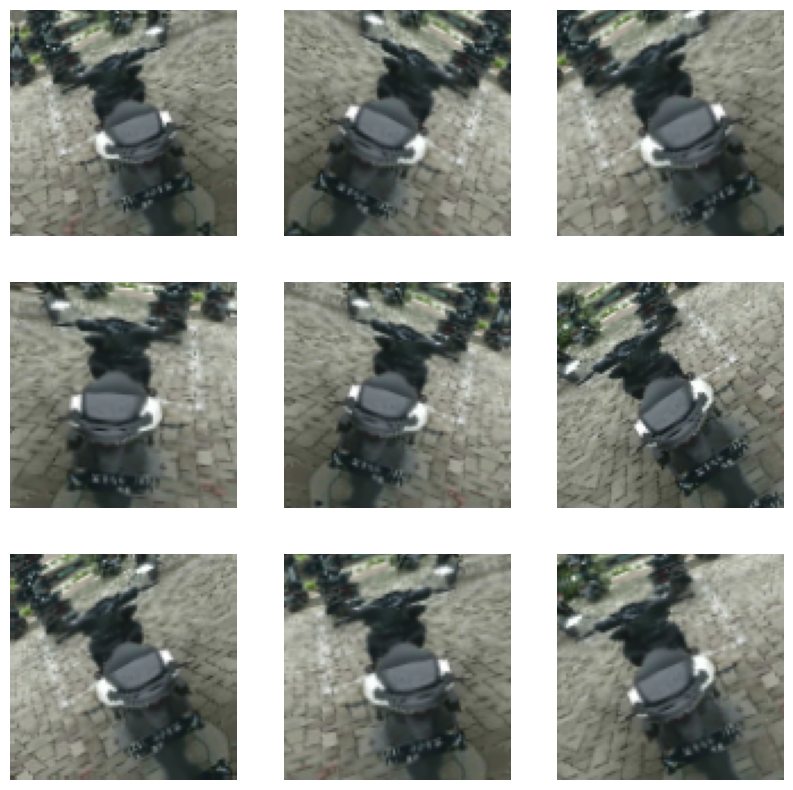

In [40]:
plt.figure(figsize=(10, 10))
for images,_ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [41]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense (128, activation='relu'),
  layers.Dense (num_classes, name="outputs")
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 100, 100, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 50, 50, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,611,630 (13.78 MB)

 Trainable params: 1,203,876 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,407,754 (9.18 MB)

In [44]:
epochs = 15
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.4349 - loss: 1.2379 - val_accuracy: 0.4706 - val_loss: 1.2017
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5407 - loss: 1.0918 - val_accuracy: 0.5882 - val_loss: 1.0668
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6248 - loss: 1.0216 - val_accuracy: 0.6176 - val_loss: 1.0577
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6372 - loss: 0.9202 - val_accuracy: 0.5980 - val_loss: 1.0373
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7561 - loss: 0.7093 - val_accuracy: 0.7255 - val_loss: 0.7662
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7659 - loss: 0.6451 - val_accuracy: 0.7451 - val_loss: 0.6266
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7989 - loss: 0.6042 - val_accuracy: 0.7941 - val_loss: 0.5358
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8472 - loss: 0.4751 - val_accuracy: 0.8039 - v

<function matplotlib.pyplot.show(close=None, block=None)>

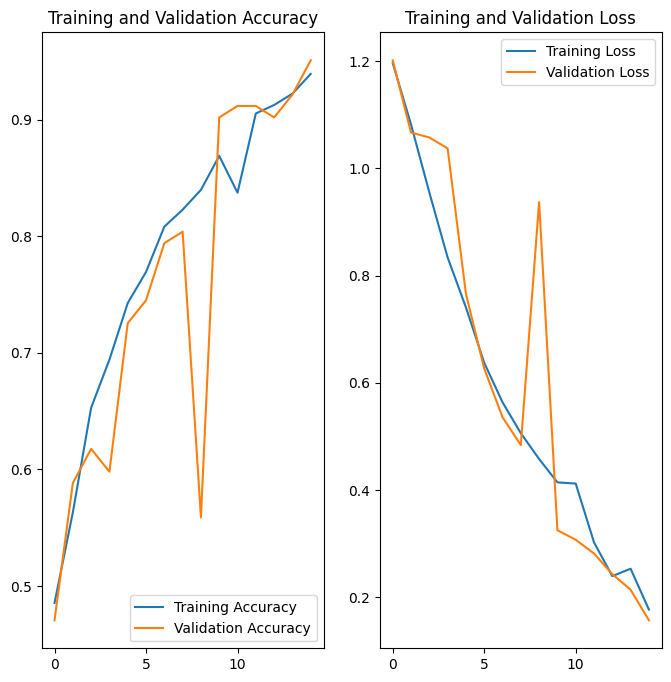

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show

In [58]:
#predict Beat Hijau
Beat_Hijau_path = '/content/drive/MyDrive/Motor Beat/Beat Hijau/galib_mp4-0037_jpg.rf.7b25c4e2743e3111d8d2da17cb6ba594.jpg'

img = tf.keras.utils.load_img(
    Beat_Hijau_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
  "This image most likely belongs to {} with a {:.2f} percent confidence."
  .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
This image most likely belongs to Beat Hijau with a 94.65 percent confidence.


In [59]:
#predict Beat Hitam
Beat_Hitam_path = '/content/drive/MyDrive/Motor Beat/Beat Hijau/galib_mp4-0037_jpg.rf.7b25c4e2743e3111d8d2da17cb6ba594.jpg'

img = tf.keras.utils.load_img( # Changed 'ing' to 'img'
    Beat_Hitam_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
  "This image most likely belongs to {} with a {:.2f} percent confidence."
  .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This image most likely belongs to Beat Hijau with a 94.65 percent confidence.


In [60]:
#predict Beat Merah
Beat_Merah_path = '/content/drive/MyDrive/Motor Beat/Beat Hijau/galib_mp4-0037_jpg.rf.7b25c4e2743e3111d8d2da17cb6ba594.jpg'

img = tf.keras.utils.load_img( # Changed 'ing' to 'img'
    Beat_Merah_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
  "This image most likely belongs to {} with a {:.2f} percent confidence."
  .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This image most likely belongs to Beat Hijau with a 94.65 percent confidence.


In [61]:
#predict Beat Putih
Beat_Putih_path = '/content/drive/MyDrive/Motor Beat/Beat Hijau/galib_mp4-0037_jpg.rf.7b25c4e2743e3111d8d2da17cb6ba594.jpg'

img = tf.keras.utils.load_img( # Changed 'ing' to 'img'
    Beat_Putih_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
  "This image most likely belongs to {} with a {:.2f} percent confidence."
  .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This image most likely belongs to Beat Hijau with a 94.65 percent confidence.
